## Introduction to Sympy

What if you would like to perform some calculus alongside your other computations? For that, you would need a computer algebra system (CAS). Luckily, the sympy package can provide you with the tools to perform symbolic computations and then can help you numerically evaluate those results.

Let's get started...

In [1]:
# Import sympy tools
import sympy as sp
sp.init_printing(use_latex=True)

# Other tools
import numpy as np
import matplotlib.pyplot as plt

Note that I imported sympy, but then also initialized the sympy printing facilities to utilize $\LaTeX$. The reason for this will be obvious soon, if you haven't already figured it out.

Rather than have x be a vector, I need it to be a symbol. In particular, I need it to be a symbol that one would like to manipulate similar to how one uses symbols in mathematical expressions. Unlike variables which point to specific data structures, a symbol is more like how a variable is used in mathematics, and can take on values at a later time.

In [2]:
# Make x a symbol
x = sp.symbols('x')

In [3]:
# Let's write an expression
y = sp.cos(x)

In [4]:
# Just provide the expression by itself,
# and it will be printed with LaTeX!
y

So, you can define mathematical expressions in sympy, and they will be rendered using $\LaTeX$. Don't be confused by the naming conventions though. In this particular case, x is a standard python variable: it just so happens to reference the sympy _symbol_ 'x'. We are naming the python variable the same as the intended mathematical symbol just for parsimony. Similarly, y is a standard python variable, but it now references a sympy expression (which itself is composed of a sympy function defined in terms of the symbol x):

In [5]:
type(x)

sympy.core.symbol.Symbol

In [6]:
type(y)

cos

In [7]:
type(type(y))

sympy.core.function.FunctionClass

In [8]:
y.free_symbols

Additionally, we can perform symbolic math on that expression. For example, let's take the derivative with respect to x using the `diff()` function.

In [9]:
dydx = y.diff(x)

In [10]:
dydx

Now we have the derivative of the function with respect to x, and have solved it __analytically__ (rather than numerically) using sympy! The `diff()` function is a member function of the function class, but you can also use the general `diff()` function if desired:

In [11]:
sp.diff(y,x)

Sympy has it's own builtin function which utilize matplotlib underneath for plotting expressions as well...

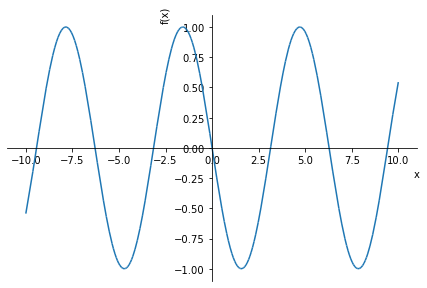

In [12]:
sp.plot(dydx)

However, we may want more control over the x values sampled and plot itself. This can sometimes be better done by evaluating the function _numerically_ at the intended points. Let's do that now...

In [13]:
x_vals = np.linspace(-2*np.pi,2*np.pi,101)
y_vals = np.array([dydx.evalf(subs=dict(x=x_val)) for x_val in x_vals])
print('The length of x is %d'%(len(x_vals)))
print('The length of y is %d'%(len(y_vals)))

The length of x is 101
The length of y is 101


Here we have used a python list comprehension to evaluate our derivative (dydx) at each of the 101 points in the $-2\pi$ to $2\pi$ range created by `linspace()`. The `evalf()` function allows us plug in specific numberic values for our symbols. In particular, we pass the subs= argument a python dictionary object which contains a mapping from a symbol to a particular value we would like to associate with that symbol. Multiple symbols can be passed into the function using the dictionary object, so that functions with more than one symbol can be evaluated numerically as well. We can now plot those specific values and maintain full control over the appearance of the plot itself since we are using matplotlib/pyplot directly:

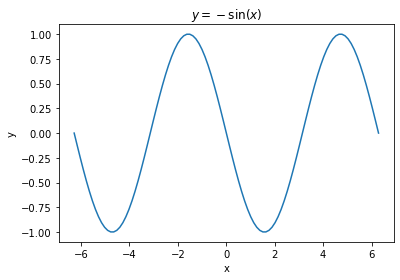

In [14]:
plt.plot(x_vals,y_vals)
plt.title(r'$y=%s$'%(sp.latex(dydx)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

You can also now see in the code above how the `sympy.latex()` function can be used to convert the expression we were storing in dydx into a string form recognized by $\LaTeX$ math mode, and therefore also the `pyplot.title()` function from matplotlib. It's usually much easier to control how you want your plots to look using numerical evaluation instead of using sympy's built-in plotting tools, so keep that in mind in the future.